# 데이터조 발표 자료

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [ ]:
!git clone https://github.com/jiho050718/datajo

Cloning into 'datajo'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 279.49 KiB | 1.39 MiB/s, done.
Resolving deltas: 100% (1/1), done.


## CSV 불러와서 일부 출력

In [ ]:
# CSV 파일 불러오기
df = pd.read_csv("datajo/titanic1309.csv")
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C


## 데이터 프레임으로 저장 후 칼럼 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


## 타이타닉 열(변수) 설명

| 변수명        | 설명                                                         |
| ------------- | ------------------------------------------------------------ |
| `PassengerId` | 승객 고유 번호 (각 사람을 구별하는 ID)                      |
| `Survived`    | 생존 여부 (0 = 사망, 1 = 생존)                               |
| `Pclass`      | 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)                  |
| `Name`        | 승객 이름 (예: Mr. John Smith)                              |
| `Sex`         | 성별 (`male` = 남자, `female` = 여자)                      |
| `Age`         | 나이 (정수 또는 실수, 일부 결측값 존재)                      |
| `SibSp`       | 함께 탄 형제자매 또는 배우자 수                              |
| `Parch`       | 함께 탄 부모 또는 자녀 수                                   |
| `Ticket`      | 티켓 번호 (탑승권 번호)                                      |
| `Fare`        | 운임 요금 (티켓 가격)                                        |
| `Cabin`       | 선실 번호 (많은 결측값 존재)                                |
| `Embarked`    | 탑승한 항구 (`C`=셰르부르, `Q`=퀸스타운, `S`=사우샘프턴) |

# 생존율

## 좌석별 생존율

In [ ]:
# 1등석 데이터 필터링
second_class = df[df['Pclass'] == 1]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['1등석 총 승객 수', '1등석 생존자 수', '1등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,1등석 총 승객 수,323.00
1,1등석 생존자 수,186.00
2,1등석 생존율 (%),57.59


In [ ]:
# 2등석 데이터 필터링
second_class = df[df['Pclass'] == 2]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['2등석 총 승객 수', '2등석 생존자 수', '2등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,2등석 총 승객 수,277.00
1,2등석 생존자 수,117.00
2,2등석 생존율 (%),42.24


In [ ]:
# 3등석 데이터 필터링
second_class = df[df['Pclass'] == 3]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['3등석 총 승객 수', '3등석 생존자 수', '3등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,3등석 총 승객 수,709.00
1,3등석 생존자 수,191.00
2,3등석 생존율 (%),26.94


## 좌석별 생존율 시각화

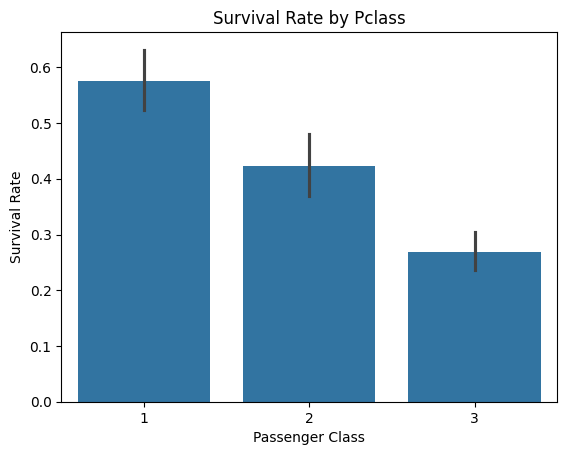

In [ ]:
# 시각화
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## 나이별 생존율

In [ ]:
# 나이를 10세 단위로 범주화
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                        labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
                        include_lowest=True)

# 나이 그룹별 생존율 계산
age_survival_rate = df.groupby('AgeGroup', observed=True)['Survived'].agg(['count', 'sum', 'mean'])
age_survival_rate['Survival Rate (%)'] = age_survival_rate['mean'] * 100
age_survival_rate = age_survival_rate[['count', 'sum', 'Survival Rate (%)']].round(2)
age_survival_rate.columns = ['Total Passengers', 'Survivors', 'Survival Rate (%)']

# 데이터프레임 표로 출력
print("\n전체 나이 그룹별 생존율:")
print(age_survival_rate.to_string())


전체 나이 그룹별 생존율:
          Total Passengers  Survivors  Survival Rate (%)
AgeGroup                                                
0-10                    86         48              55.81
10-20                  162         66              40.74
20-30                  361        129              35.73
30-40                  210         89              42.38
40-50                  132         48              36.36
50-60                   62         28              45.16
60-70                   27          7              25.93
70-80                    6          2              33.33


## 나이별 생존율 시각화

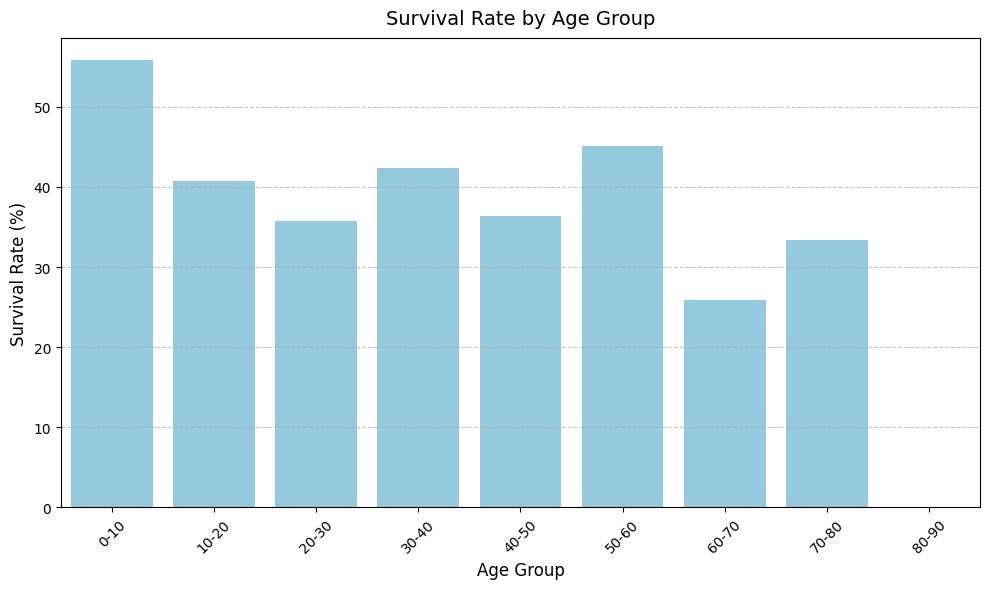

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate['Survival Rate (%)'], color='skyblue')
plt.title('Survival Rate by Age Group', fontsize=14, pad=10)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 성별별 생존율

In [ ]:
# 성별별 생존율 계산
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100

# 결과 출력
print("성별별 생존율 (%):")
print(survival_by_sex)

성별별 생존율 (%):
Sex
female    82.618026
male      12.930012
Name: Survived, dtype: float64


## 성별별 생존율 시각화

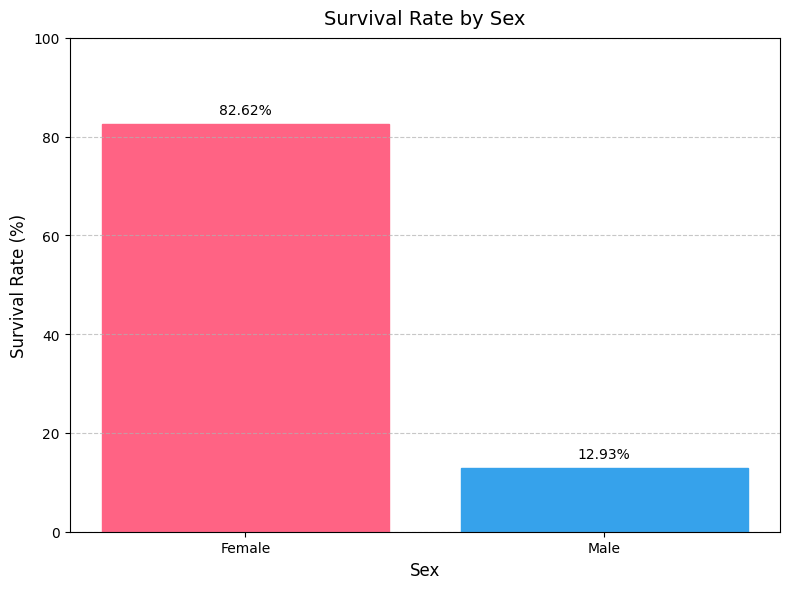

In [ ]:
# 데이터 준비
labels = ['Female', 'Male']
survival_rates = [survival_by_sex['female'], survival_by_sex['male']]
colors = ['#FF6384', '#36A2EB']  # 여성: 핑크, 남성: 파랑

# 막대 차트 생성
plt.figure(figsize=(8, 6))  # 차트 크기 (너비 8인치, 높이 6인치)
plt.bar(labels, survival_rates, color=colors, edgecolor=colors, linewidth=1)

# 차트 설정
plt.title('Survival Rate by Sex', fontsize=14, pad=10)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)  # Y축 범위 0~100%
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축 그리드 추가

# 값 레이블 추가 (각 막대 위에 생존율 표시)
for i, rate in enumerate(survival_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center', fontsize=10)

# 차트 표시
plt.tight_layout()
plt.show()

# 탑승한 항구별 인원

In [ ]:
# 항구별 인원수 계산
embarked_counts = df['Embarked'].value_counts()

# 결과 출력
print("\n탑승 항구별 인원수:")
print(embarked_counts)


탑승 항구별 인원수:
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


# 자유 데이터

In [ ]:
# CSV 파일 불러오기
df1 = pd.read_csv("datajo/seoul.csv")
df1

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20250301,장항선,탕정,1638,1517,20250304,NaN
20250301,장항선,배방,1165,1141,20250304,NaN
20250301,장항선,온양온천,5769,5961,20250304,NaN
20250301,장항선,신창(순천향대),1913,1129,20250304,NaN
20250301,중앙선,회기,21152,19411,20250304,NaN
...,...,...,...,...,...,...
20250331,2호선,을지로3가,27320,27045,20250403,NaN
20250331,2호선,을지로입구,53083,54856,20250403,NaN
20250331,2호선,서울대입구(관악구청),50708,49014,20250403,NaN
20250331,2호선,낙성대(강감찬),30009,30119,20250403,NaN
